# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
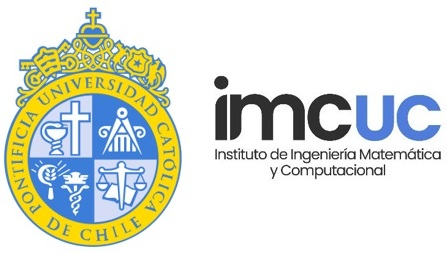

# <h1><center>Actividad 09: Actividad de Integración</center></h1>

Esta actividad busca que conecten el trabajo de aestadísticas y visualización básica con los algoritmos que hemos estudiado de "machine learning".

## Instrucciones

Esto Notebook contiene todas las instrucciones a realizar para la actividad. Si siente que falta alguna información debe agregar un supuesto en una celda adicional. No hay preguntas durante el trabajo.

Al finalizarla, deben subir el Notebook a la actividad disponible en Canvas, en la sección de Tareas bajo "Actividad 09".
    
**La actividad debe ser subida antes del final de la clase. Entregas posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Para esta actividad utilizaremos el dataset oceanográfico ed la **California Cooperative Oceanic Fisheries Investigations (CalCOFI)**, que contiene 60 años de mediciones de temperatura y salinidad del agua, además de datos sobre larvas y especies de peces. <br>

Para más información: https://calcofi.org/data/oceanographic-data/bottle-database/

La base en esta fecha posee más de 890,000 registros (y pesa más de 100 Mb). Para facilitar que lo descarguen, su lectura y modelamiento, se ha extraído un conjunto de sólo 1000 registros de este dataset al azar, contenidos en el archivo `bottle_2024.csv`. Se han eliminado además la mayoría de las columnas, dejando sólo las de `salinidad` y `temperatura`.

----
***CalCOFI: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?***

*The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for **documenting climatic cycles in the California Current and a range of biological responses to them.** CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.*

*The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway.* ***Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.***

----

## Rúbrica

- Si han logrado hasta el punto 2: 4.0
- Si han logrado hasta el punto 3 completo: 6.0
- Si han logrado todo: 7.0

In [3]:
# librerías recomendadas para el ejercicio, puede incluir otras si lo desea.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos

### 1.1 Lectura
Lea el archivo `.csv`, dejando la información en un DataFrame.

In [14]:
bottle = pd.read_csv("bottle_2024.csv")
bottle

,Unnamed: 0,temp_deg,salinity
0,0,10.50,33.440
1,1,10.46,33.440
2,2,10.46,33.437
3,3,10.45,33.420
4,4,10.45,33.421
...,...,...,...
995,1027,6.47,33.962
996,1028,5.90,34.020
997,1029,5.25,34.140
998,1030,5.39,34.080


### 1.2 Visualización
Grafique los datos en un `scatter plot` que muestre la temperatura como función de la salinidad. No olvide que todo gráfico debe tener nombres en los ejes.

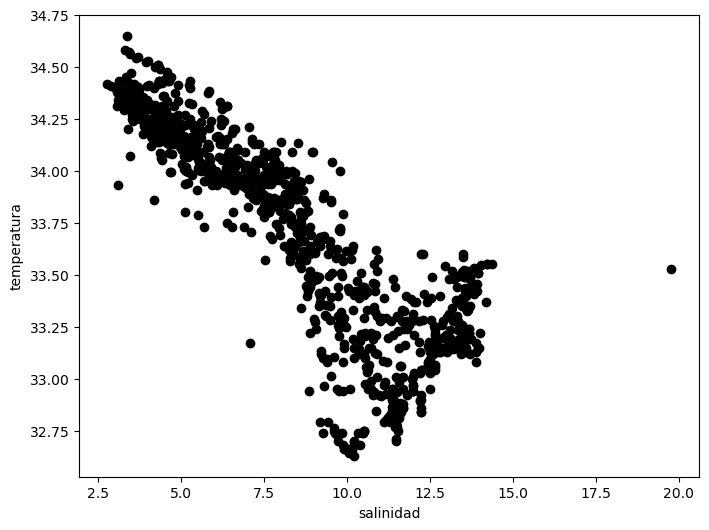

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(bottle["temp_deg"], bottle["salinity"], color="k")

plt.xlabel("salinidad")
plt.ylabel("temperatura")
plt.show()

## 2. Separación de datos

Como hemos visto en clases, debemos separar los datos entre un conjunto de entrenamiento y otro de prueba/validación. Para hacerlo podemos aprovechar la librería `sklearn` que posee una función para realizar esta división. 

Asumiendo que sus datos están en un DataFrame llamado `bottle`, la separación entre entramiento y validación se hace de la siguiente forma (ajuste su código para que quede separado el data set con esta celda):

In [19]:
# importamos la librería correspondiente
from sklearn.model_selection import train_test_split

# dividimos el dataframe 'bottle' siendo el test un 20% del total
train, test = train_test_split(bottle, test_size=0.2, random_state=42)

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   temp_deg    200 non-null    float64
 2   salinity    200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


### 2.1 Visualización
Vuelva a realizar el `scatter plot` mostrando de diferente color los datos que son del conjunto `train` y `test`. No olvide el nombre en los ejes y la leyenda que indique qué color es del conjunto de entrenamiento y qué color el de prueba.

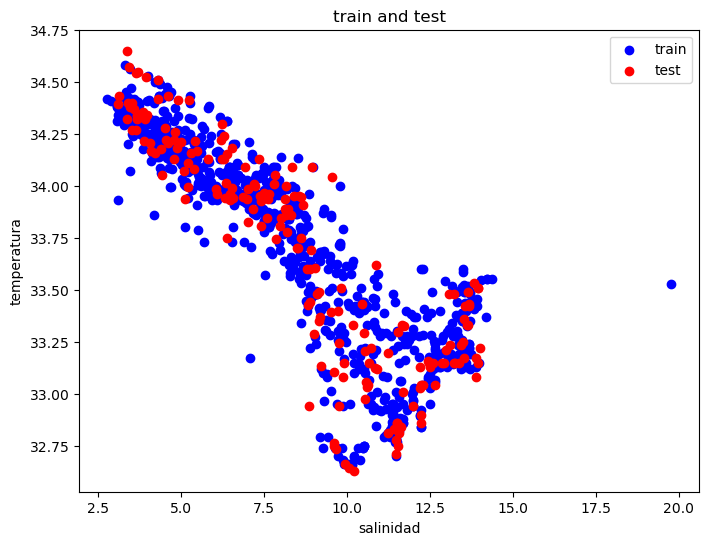

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(train["temp_deg"], train["salinity"], color="blue", label="train")
plt.scatter(test["temp_deg"], test["salinity"], color="red", label="test")

plt.xlabel("salinidad")
plt.ylabel("temperatura")
plt.title("train and test")
plt.legend()
plt.show()

## 3. Regresión Lineal

Usando la librería de su preferencia (`statmodels` o `sklearn`) arme un modelo de regresión lineal para los datos de entrenamiento. Muestre los valores de beta_0 y beta_1 de su modelo.

¿Cuál es el valor de r² y RMSE de su modelo en los conjuntos de entrenamiento y de prueba?

Grafique los datos de entrenamiento, de prueba y el modelo de regresión en el mismo `scatter plot`.

## 4. Regresión Polinomial

Ahora, usando nuevamente la librería de su preferencia (`statmodels` o `sklearn`), arme un modelo de regresión polinomial para los datos de entrenamiento. En este caso arme uno de grado dos y muestre los valores de beta_0, beta_1 y beta_2 de su modelo.

¿Cuál es el RMSE de su modelo en los conjuntos de entrenamiento y de prueba? ¿Son mejores que en el caso lineal?

Grafique los datos de entrenamiento, de prueba y el modelo de regresión en el mismo `scatter plot`.